In [101]:
###################
# David Richardson - Online Sales Exploratory Data Analysis / 2nd Python attempt (outside of DataCamp)
# with help from Anthony Vibin (Touch the Tech) https://www.youtube.com/watch?v=caJLbfPtkAU
#
################### 
#
# Library

import numpy as np # Calcs
import pandas as pd # Arrays / ML
import seaborn as sns # Graphs
import matplotlib.pyplot as plt # Graphs and shit
import os # Comms with OS

%matplotlib inline # A magic command to display output (graphs etc) inline with the code

In [2]:
df = pd.read_csv('OnlineRetail.csv', encoding = 'latin1')

In [3]:
df.head() ## display top 5 entries in the data (from December 2010)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
## Re-arranging the column order

df=df[['CustomerID','InvoiceNo','StockCode','Quantity','UnitPrice','Description','InvoiceDate','Country']]

In [5]:
df.head() # display top 5

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom
1,17850.0,536365,71053,6,3.39,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom
2,17850.0,536365,84406B,8,2.75,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom
3,17850.0,536365,84029G,6,3.39,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom
4,17850.0,536365,84029E,6,3.39,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom


In [6]:
# Data Preprocessing
## We can see here that there are 135080 instances of sales data with no CustomerID and 1454 with no description

df.isnull().sum()

CustomerID     135080
InvoiceNo           0
StockCode           0
Quantity            0
UnitPrice           0
Description      1454
InvoiceDate         0
Country             0
dtype: int64

In [9]:
## Grouping the data by country

df.groupby('Country').count()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,Description,InvoiceDate
Country,,,,,,,
Australia,1259,1259,1259,1259,1259,1259,1259
Austria,401,401,401,401,401,401,401
Bahrain,17,19,19,19,19,19,19
Belgium,2069,2069,2069,2069,2069,2069,2069
Brazil,32,32,32,32,32,32,32
Canada,151,151,151,151,151,151,151
Channel Islands,758,758,758,758,758,758,758
Cyprus,622,622,622,622,622,622,622
Czech Republic,30,30,30,30,30,30,30


In [28]:
# Online retail business in 36 countries + Unspecified + European Community (38 total)
## We can see here that there have been a far greater amount of orders in the UK than everywhere else (bar plot later)

df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [30]:
# Trying to just get a value for amount of countries ## not sure how # df['Country'] ## 
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [55]:
# Analyze the sales performance of this company, and provide your insights
# We need to be able to look at history and compare - 6 months, 9 months, 2 years etc.
# TRENDS ??
# Start with 'Feature Engineering' a new column 'TotalAmount' by multiplying 'Quantity' and 'UnitPrice'

TotalAmount = df['Quantity'] * df['UnitPrice']
df.insert(loc=5,column='TotalAmount',value=TotalAmount) # Inserting new column into the dataFrame # Feature Enginnering


In [39]:
# Create a new DataFrame with the added column and removing 'UnitPrice'
# We're most interested in business aspects at this stage # !!!!

new_df = df[['CustomerID','InvoiceNo','StockCode','Quantity','TotalAmount','InvoiceDate','Country']]

new_df2 = df.copy()

In [40]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country
0,17850.0,536365,85123A,6,15.30,12/1/2010 8:26,United Kingdom
1,17850.0,536365,71053,6,20.34,12/1/2010 8:26,United Kingdom
2,17850.0,536365,84406B,8,22.00,12/1/2010 8:26,United Kingdom
3,17850.0,536365,84029G,6,20.34,12/1/2010 8:26,United Kingdom
4,17850.0,536365,84029E,6,20.34,12/1/2010 8:26,United Kingdom


In [57]:
# Exploratory Data Analysis
# Grouping countries by Quantity of sales

country_price = new_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


In [58]:
# Exploratory Data Analysis
# Grouping countries by TotalAmount of sales

country_priceTA = new_df.groupby('Country')['TotalAmount'].sum().sort_values(ascending = False)
country_priceTA

Country
United Kingdom          8187806.364
Netherlands              284661.540
EIRE                     263276.820
Germany                  221698.210
France                   197403.900
Australia                137077.270
Switzerland               56385.350
Spain                     54774.580
Belgium                   40910.960
Sweden                    36595.910
Japan                     35340.620
Norway                    35163.460
Portugal                  29367.020
Finland                   22326.740
Channel Islands           20086.290
Denmark                   18768.140
Italy                     16890.510
Cyprus                    12946.290
Austria                   10154.320
Hong Kong                 10117.040
Singapore                  9120.390
Israel                     7907.820
Poland                     7213.140
Unspecified                4749.790
Greece                     4710.520
Iceland                    4310.000
Canada                     3666.380
Malta               

Text(0.5, 1.0, 'Top 5 Countries with most orders')

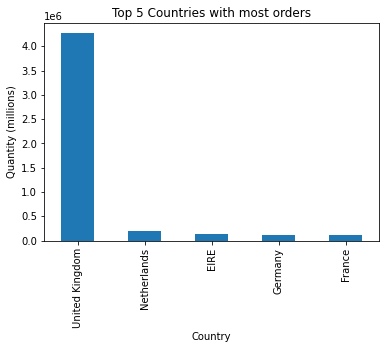

In [61]:
# Top 5 Companies with high number of purchases
country_price[:5].plot(kind = 'bar')

# Set titles and labels
plt.xlabel('Country')
plt.ylabel('Quantity (millions)')
plt.title('Top 5 Countries with most orders')

#### Don't know why the yxis values look like this ? ####

<AxesSubplot:xlabel='Country'>

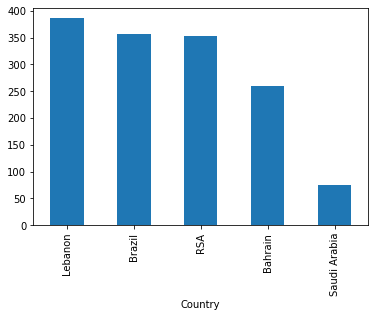

In [60]:
# 5 Compaies with least number of purchase
## Could implement a better 'Global Marketing Strategy' to target low ordering countries
## and help raise awareness / promote brand - also investigate popular products in these countries 
## to increase product offering

country_price[33:].plot(kind = 'bar')

In [83]:
# Adding a new 'Year' feature / column to the dataset ### 

#new_df['InvoiceDate'].dtype

new_df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M') # Assigning the date 
# that was a dtype(object) into a readable 'datetime'-like object to be able to extract the year

timest = new_df['InvoiceDate'].dt.year # Extracts the year out of the date #(result = sr.dt.year)

new_df['Year'] = timest # Creates new 'Year' column in the DataFrame

new_df.head() # shows top 5

/var/folders/d7/q_fznsr95_97r6lp_mx_vp640000gn/T/ipykernel_88834/809507862.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')
/var/folders/d7/q_fznsr95_97r6lp_mx_vp640000gn/T/ipykernel_88834/809507862.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Year'] = timest # Create new column in the DataFrame


,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,Year
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2010
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2010
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,2010


<AxesSubplot:xlabel='Year'>

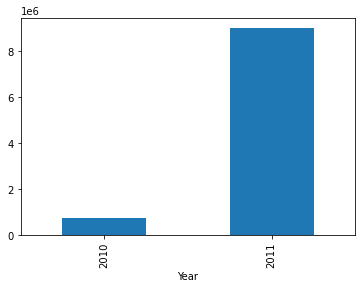

In [84]:
# Total sales for different years ###

new_df.groupby('Year')['TotalAmount'].sum().plot(kind = 'bar')

<AxesSubplot:title={'center':'Sales month wise'}, xlabel='Mon,Year'>

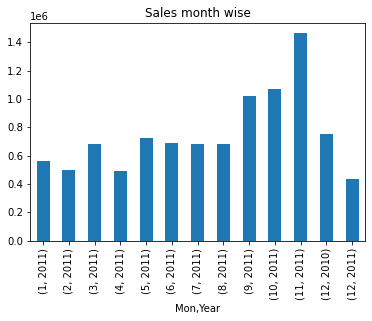

In [86]:
# Sales for different months
## Shows that we only have sales data for one month (December) in 2010 and a full years sales data for 2011
## This is why December sales data looks better in 2010 than in 2011
## Also that comparing December sales to November sales (in 2011) - there is a huge drop in sales - why ??

new_df['Mon'] = new_df['InvoiceDate'].dt.month
new_df['month'] = new_df['InvoiceDate'].dt.month_name() 
new_df.groupby(['Mon','Year'])['TotalAmount'].sum().plot(kind = 'bar', title = 'Sales month wise')

In [87]:
# Checking why dec 2011 has a drop comparing to nov 2011

## So the data only goes up to 9th December 2011 - this is why there was a difference November to December 2011
## September, October, November are the best performing months looking at 2011

get_2011 = new_df[(new_df['Year'] == 2011)] # New DataFrame with only 2011 values
get_dec2011 = get_2011[(new_df['month'] == 'December')] # Looking at only December 2011
get_dec2011 = get_dec2011['InvoiceDate'].dt.date.unique()
get_dec2011

/var/folders/d7/q_fznsr95_97r6lp_mx_vp640000gn/T/ipykernel_88834/1373315995.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  get_dec2011 = get_2011[(new_df['month'] == 'December')] # Looking at only December 2011


array([datetime.date(2011, 12, 1), datetime.date(2011, 12, 2),
       datetime.date(2011, 12, 4), datetime.date(2011, 12, 5),
       datetime.date(2011, 12, 6), datetime.date(2011, 12, 7),
       datetime.date(2011, 12, 8), datetime.date(2011, 12, 9)],
      dtype=object)

In [88]:
# 3. Based on your analysis of the data, what are potential areas of improvement for the business?

## What can we do to boost sales ? Why are there few sales in Czech Republic compared to Germany ? etc. 
## What is the problem ?

new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,Year,Mon,month
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2010,12,December
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2010,12,December
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December


In [90]:
# This gets rid of the missing values
## Pandas DataFrame dropna() function is used to remove rows and columns with Null/NaN values. 
## By default, this function returns a new DataFrame and the source DataFrame remains unchanged

new_df = new_df.dropna()
new_df.isnull().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Quantity       0
TotalAmount    0
InvoiceDate    0
Country        0
Year           0
Mon            0
month          0
dtype: int64

<AxesSubplot:title={'center':'Top 5 countries by amount of customers'}, xlabel='Country'>

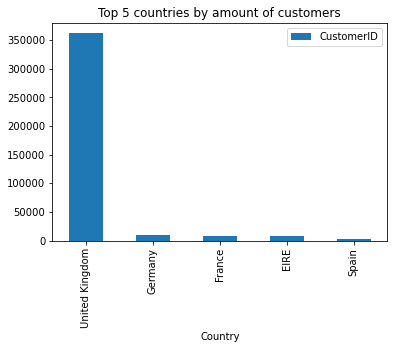

In [92]:
# Top 5 countries by number of customers
## Using the unique CustomerID values to count 
## Unsurprisingly the UK has the most customers

cus_id = pd.DataFrame(new_df.groupby('Country')['CustomerID'].count().sort_values(ascending = False))
cus_id[:5].plot(kind = 'bar', title = 'Top 5 countries by amount of customers')

<AxesSubplot:title={'center':'Least amount customers by country'}, xlabel='Country'>

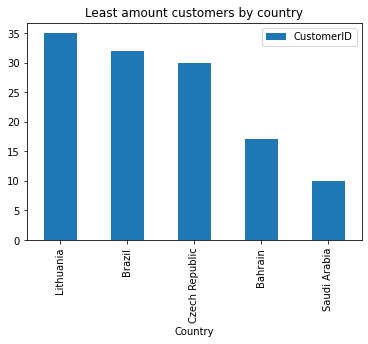

In [93]:
# Countries with less number of customers

cus_id[-5:].plot(kind = 'bar', title = 'Least amount customers by country') # Using -5 to go back and slice

In [94]:
# Insights / Answers at this point
# We see that September to December we have very high sales
# We can concentrate on improving the sales for the other 8 months
# We have few customers in Lithania, Brazil, Czech Republic, Bahrain, Saudi Arabia
# We have little sales for Lebanon, Brazil, (RSA)South Africa, Bahrain, Saudi Arabia. 
# We can concentrate on improving sales in these locations via market analysis, relevant product offering & targeted marketing
# We could improve the business by increasing the customers and sales point of view

In [95]:
# 4. What are additional business problems that can be analyzed using this data. Support with explanation.

In [97]:
# Removing the REMAINING null values since we are checking the data based on customer and description
## So lets look at items

new_df2 = new_df2.dropna()
new_df2.isnull().sum()
new_df2.head()

,CustomerID,InvoiceNo,StockCode,Quantity,UnitPrice,TotalAmount,Description,InvoiceDate,Country
0,17850.0,536365,85123A,6,2.55,15.30,WHITE HANGING HEART T-LIGHT HOLDER,12/1/2010 8:26,United Kingdom
1,17850.0,536365,71053,6,3.39,20.34,WHITE METAL LANTERN,12/1/2010 8:26,United Kingdom
2,17850.0,536365,84406B,8,2.75,22.00,CREAM CUPID HEARTS COAT HANGER,12/1/2010 8:26,United Kingdom
3,17850.0,536365,84029G,6,3.39,20.34,KNITTED UNION FLAG HOT WATER BOTTLE,12/1/2010 8:26,United Kingdom
4,17850.0,536365,84029E,6,3.39,20.34,RED WOOLLY HOTTIE WHITE HEART.,12/1/2010 8:26,United Kingdom


In [98]:
# Sales Average of each product

avg_sales = new_df2.groupby(['StockCode','Description'])['Quantity','TotalAmount'].mean().sort_values(by = 'Quantity',ascending = False)
avg_sales

/var/folders/d7/q_fznsr95_97r6lp_mx_vp640000gn/T/ipykernel_88834/682797469.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_sales = new_df2.groupby(['StockCode','Description'])['Quantity','TotalAmount'].mean().sort_values(by = 'Quantity',ascending = False)


,,Quantity,TotalAmount
StockCode,Description,,
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
84568,GIRLS ALPHABET IRON ON PATCHES,520.000000,97.200000
84826,ASSTD DESIGN 3D PAPER STICKERS,368.702703,9.145405
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,21.320000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
...,...,...,...
21412,VINTAGE GOLD TINSEL REEL,-6.000000,-2.520000
79323W,WHITE CHERRY LIGHTS,-8.000000,-54.000000
21144,PINK POODLE HANGING DECORATION,-12.000000,-4.560000


In [100]:
# Sales Average of each product

avg_sales = new_df2.groupby(['StockCode','Description'])['Quantity','TotalAmount'].mean().sort_values(by = 'Quantity',ascending = False)
avg_sales[-50:]

/var/folders/d7/q_fznsr95_97r6lp_mx_vp640000gn/T/ipykernel_88834/3522639738.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_sales = new_df2.groupby(['StockCode','Description'])['Quantity','TotalAmount'].mean().sort_values(by = 'Quantity',ascending = False)


,,Quantity,TotalAmount
StockCode,Description,,
90059C,DIAMANTE HAIR GRIP PACK/2 MONTANA,0.500000,0.825000
90176A,CLASSIC DIAMANTE NECKLACE JET,0.500000,3.750000
84816,DANISH ROSE BEDSIDE CABINET,0.466667,18.643333
21275,ZINC TOP 2 DOOR WOODEN SHELF,0.454545,8.431818
21777,RECIPE BOX WITH METAL HEART,0.400000,3.180000
90202C,GREEN ENAMEL FLOWER HAIR TIE,0.333333,0.983333
90202B,WHITE ENAMEL FLOWER HAIR TIE,0.333333,0.983333
84840,SWEETHEART CARRY-ALL BASKET,0.250000,2.125000
90059A,DIAMANTE HAIR GRIP PACK/2 CRYSTAL,0.000000,0.000000
